<a href="https://colab.research.google.com/github/NataliaOsiecka/IR12BBAA/blob/master/IR_ML_moving_window2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
cd '/content/drive/My Drive/IR_ML'

/content/drive/My Drive/IR_ML


In [86]:
ls

12BBAAT100P0.CSV  12BBAAT114P0.CSV  12BBAAT97P0.CSV
12BBAAT101P0.CSV  12BBAAT115P0.CSV  12BBAAT98P0.CSV
12BBAAT102P0.CSV  12BBAAT116P0.CSV  12BBAAT99P0.CSV
12BBAAT103P0.CSV  12BBAAT117P0.CSV  corrcoef_plot.png
12BBAAT104P0.CSV  12BBAAT118P0.CSV  dendrogram.png
12BBAAT105P0.CSV  12BBAAT119P0.CSV  dendrogram_random_forest.png
12BBAAT106P0.CSV  12BBAAT120P0.CSV  elbow_method.png
12BBAAT107P0.CSV  12BBAAT90P0.CSV   moving_window_11.png
12BBAAT108P0.CSV  12BBAAT91P0.CSV   moving_window_17.png
12BBAAT109P0.CSV  12BBAAT92P0.CSV   moving_window_19.png
12BBAAT110P0.CSV  12BBAAT93P0.CSV   moving_window_20.png
12BBAAT111P0.CSV  12BBAAT94P0.CSV   moving_window_22.png
12BBAAT112P0.CSV  12BBAAT95P0.CSV   moving_window_49.png
12BBAAT113P0.CSV  12BBAAT96P0.CSV


In [0]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import files
from scipy import integrate
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from statistics import mean 

In [88]:
filenames=(glob.glob('12BBAAT*.CSV', recursive=True))
print(filenames)

df=np.zeros((1869,32))
temperature=[]

for i, item in enumerate(filenames):
    t=item[7:]
    temp=t[:-6]
    temperature.append(temp)
    data=np.loadtxt(item, delimiter=',')
    if data.shape[0]<1869:
        for j,it in enumerate(data[:,1]):
            df[j,i+1]=it
    else:
        df[:,i+1]=data[:,1]
        df[:,0]=data[:,0]

df_new=df[125:1505,:]

pd_df=pd.DataFrame(data=df_new[:,1:], 
                   index=df_new[:,0],
                   columns=temperature)

drop_wavenumber = []
wavenumber_list = list(pd_df.index)
for item in wavenumber_list:
  if item > 1730 and item < 2785:
    drop_wavenumber.append(item)

pd_df.drop(drop_wavenumber, axis=0, inplace=True)

df_norm = (pd_df-pd_df.min())/(pd_df.max()-pd_df.min())


['12BBAAT120P0.CSV', '12BBAAT119P0.CSV', '12BBAAT118P0.CSV', '12BBAAT117P0.CSV', '12BBAAT116P0.CSV', '12BBAAT115P0.CSV', '12BBAAT114P0.CSV', '12BBAAT113P0.CSV', '12BBAAT112P0.CSV', '12BBAAT111P0.CSV', '12BBAAT110P0.CSV', '12BBAAT109P0.CSV', '12BBAAT108P0.CSV', '12BBAAT107P0.CSV', '12BBAAT106P0.CSV', '12BBAAT105P0.CSV', '12BBAAT104P0.CSV', '12BBAAT103P0.CSV', '12BBAAT102P0.CSV', '12BBAAT101P0.CSV', '12BBAAT100P0.CSV', '12BBAAT99P0.CSV', '12BBAAT98P0.CSV', '12BBAAT97P0.CSV', '12BBAAT96P0.CSV', '12BBAAT95P0.CSV', '12BBAAT94P0.CSV', '12BBAAT93P0.CSV', '12BBAAT92P0.CSV', '12BBAAT91P0.CSV', '12BBAAT90P0.CSV']


In [89]:
pd_df.shape

(833, 31)

In [90]:
n = pd_df.shape[0]
dividers = [x for x in range(1, n+1) if n % x == 0]
print(dividers)

[1, 7, 17, 49, 119, 833]


In [0]:
n = int(pd_df.shape[0]/7)
intens_clust = np.zeros((n,pd_df.shape[1]))
mean_wavenumber = []
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.00001, random_state=0)
for i in range(n):
  window = pd_df.iloc[i*7:(i+1)*7].copy()
  mean_wavenumber.append(mean(window.index))
  df_transposed = window.T
  y_km=km.fit_predict(df_transposed)
  for j in range(window.shape[1]):
    intens_clust[i,j] = y_km[j]

In [0]:
new_clust_df=pd.DataFrame(data=intens_clust, 
                   index=mean_wavenumber,
                   columns=temperature)

In [0]:
clust_df = new_clust_df.T

In [0]:
for i in range(clust_df.shape[1]):
  new_vector = clust_df.iloc[:,i].values
  #print('orginalny')
  #print(new_vector)

  index0 = np.where(new_vector == 0)
  index1 = np.where(new_vector == 1)
  index2 = np.where(new_vector == 2)
  index3 = np.where(new_vector == 3)

  indexes = [index0[0][0], index1[0][0], index2[0][0], index3[0][0]]

  sort_index = sorted(indexes)

  for x, item in enumerate(sort_index):
    if item in index0[0]:
      delta = x-0
      new_vector[index0[0]] = new_vector[index0[0]]+delta
    elif item in index1[0]:
      delta = x-1
      new_vector[index1[0]] = new_vector[index1[0]]+delta
    elif item in index2[0]:
      delta = x-2
      new_vector[index2[0]] = new_vector[index2[0]]+delta
    elif item in index3[0]:
      delta = x-3
      new_vector[index3[0]] = new_vector[index3[0]]+delta

  clust_df.iloc[:,i] = new_vector
  

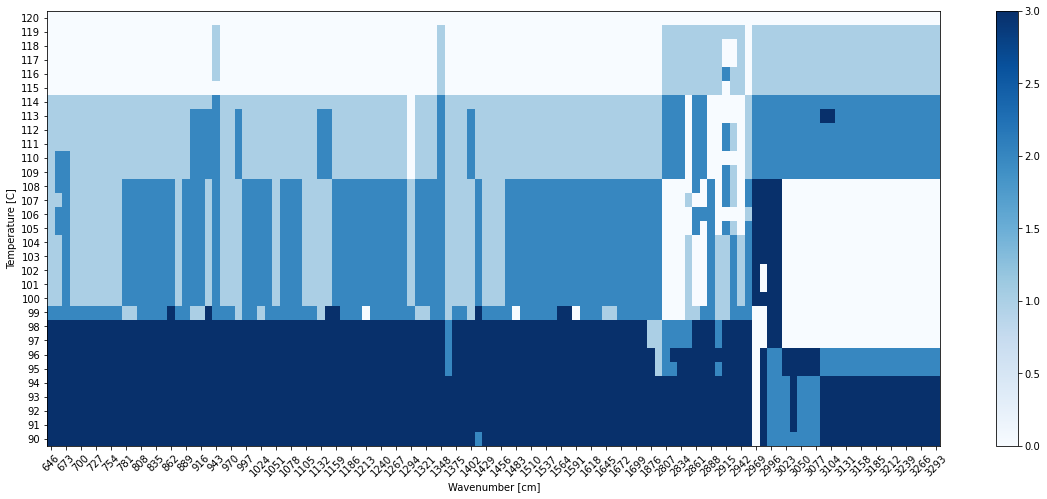

In [95]:
x_label = []
for i in clust_df.columns:
  x_label.append(str(int(i)))
plt.figure(figsize=(20,8))
plt.imshow(clust_df, aspect='auto', cmap='Blues')
plt.yticks(np.arange(clust_df.index.values.shape[0]), clust_df.index.values)
plt.xticks(np.arange(len(x_label)), x_label[::2], rotation=45)
plt.xlabel('Wavenumber [cm]')
plt.ylabel('Temperature [C]')
plt.locator_params(axis='x', nbins=len(x_label)/2)
plt.colorbar()
plt.savefig("moving_window_7.png", bbox_inches = 'tight')
files.download("moving_window_7.png")
plt.show()